In [3]:
# Cell 1
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handle imbalance
from imblearn.over_sampling import SMOTE

# Visualization (optional for EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Cell 2
df = pd.read_csv("../dataset/data.csv")
print("Shape:", df.shape)
df.head()

Shape: (100000, 48)


,survey_code,age,gender,height,weight,bmi,bmi_estimated,bmi_scaled,bmi_corrected,waist_size,blood_pressure,heart_rate,cholesterol,glucose,insulin,sleep_hours,sleep_quality,work_hours,physical_activity,daily_steps,calorie_intake,sugar_intake,alcohol_consumption,smoking_level,water_intake,screen_time,stress_level,mental_health_score,mental_health_support,education_level,job_type,occupation,income,diet_type,exercise_type,device_usage,healthcare_access,insurance,sunlight_exposure,meals_per_day,caffeine_intake,family_history,pet_owner,electrolyte_level,gene_marker_flag,environmental_risk_score,daily_supplement_dosage,target
0,1,56,Male,173.416872,56.886640,18.915925,18.915925,56.747776,18.989117,72.165130,118.264254,60.749825,214.580523,103.008176,NaN,6.475885,Fair,7.671313,0.356918,13320.942595,2673.546960,44.476887,NaN,Non-smoker,1.694262,5.003963,2,8,No,PhD,Tech,Farmer,6759.821719,Vegan,Strength,High,Poor,No,High,5,Moderate,No,Yes,0,1.0,5.5,-2.275502,healthy
1,2,69,Female,163.207380,97.799859,36.716278,36.716278,110.148833,36.511417,85.598889,117.917986,66.463696,115.794002,116.905134,10.131597,8.428410,Good,9.515198,0.568219,11911.201401,2650.376972,74.663405,Regularly,Light,0.716409,5.925455,3,9,No,High School,Office,Engineer,6240.517690,Vegan,Cardio,Moderate,Moderate,No,High,5,High,Yes,No,0,1.0,5.5,6.239340,healthy
2,3,46,Male,177.281966,80.687562,25.673050,25.673050,77.019151,25.587429,90.295030,123.073698,76.043212,138.134787,89.180302,NaN,5.702164,Poor,5.829853,3.764406,2974.035375,1746.755144,19.702382,Regularly,Heavy,2.487900,4.371250,0,1,No,Master,Office,Teacher,3429.179266,Vegan,Cardio,High,Good,Yes,High,4,Moderate,No,No,0,1.0,5.5,5.423737,healthy
3,4,32,Female,172.101255,63.142868,21.318480,21.318480,63.955440,21.177109,100.504211,148.173453,68.781981,203.017447,128.375798,18.733179,5.188316,Good,9.489693,0.889474,5321.539497,2034.193242,82.580050,Occasionally,Heavy,2.643335,4.116064,10,4,No,Master,Labor,Teacher,2618.503534,Vegetarian,Mixed,Low,Moderate,No,High,1,NaN,No,Yes,0,1.0,5.5,8.388611,healthy
4,5,60,Female,163.608816,40.000000,14.943302,14.943302,44.829907,14.844299,69.021150,150.613181,92.335358,200.412439,94.813332,16.038701,7.912514,Good,7.275450,2.901608,9791.376712,2386.210257,45.961322,NaN,Heavy,1.968393,3.180087,9,7,Yes,Master,Unemployed,Doctor,3662.086276,Vegan,NaN,Low,Moderate,Yes,High,1,High,Yes,Yes,0,1.0,5.5,0.332622,healthy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000 non-null  fl

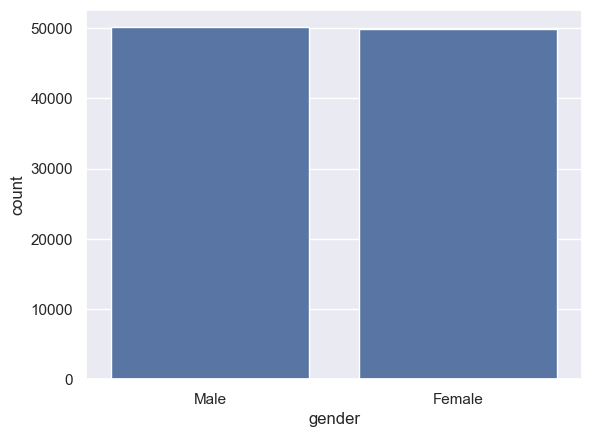

In [5]:
# Cell 3
print(df.info())          # datatypes
print(df.isnull().sum())  # missing values
df.describe()             # summary stats

# Quick distribution check
sns.countplot(x="gender", data=df)
plt.show()

In [6]:
# Cell 4
X = df.drop(columns=["target"])   # features
y = df["target"]                  # target (replace with your real label)

In [7]:
# Cell 5
numeric_features = X.select_dtypes(include=["int64","float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

Numeric: ['survey_code', 'age', 'height', 'weight', 'bmi', 'bmi_estimated', 'bmi_scaled', 'bmi_corrected', 'waist_size', 'blood_pressure', 'heart_rate', 'cholesterol', 'glucose', 'insulin', 'sleep_hours', 'work_hours', 'physical_activity', 'daily_steps', 'calorie_intake', 'sugar_intake', 'water_intake', 'screen_time', 'stress_level', 'mental_health_score', 'income', 'meals_per_day', 'electrolyte_level', 'gene_marker_flag', 'environmental_risk_score', 'daily_supplement_dosage']
Categorical: ['gender', 'sleep_quality', 'alcohol_consumption', 'smoking_level', 'mental_health_support', 'education_level', 'job_type', 'occupation', 'diet_type', 'exercise_type', 'device_usage', 'healthcare_access', 'insurance', 'sunlight_exposure', 'caffeine_intake', 'family_history', 'pet_owner']


In [8]:
# Cell 6
from sklearn.preprocessing import OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [9]:
# Cell 7
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# Cell 8
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Train shape:", X_train_processed.shape)
print("Test shape:", X_test_processed.shape)

Train shape: (80000, 83)
Test shape: (20000, 83)


In [12]:

# Cell 9 - Encode labels + SMOTE
from sklearn.preprocessing import LabelEncoder

# Encode target (if categorical)
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train_enc)

print("Before SMOTE:", np.bincount(y_train_enc))
print("After SMOTE:", np.bincount(y_train_balanced))

Before SMOTE: [23922 56078]
After SMOTE: [56078 56078]


In [13]:
# Cell 10
import pandas as pd

# Convert back to DataFrame (optional, for inspection)
X_train_balanced_df = pd.DataFrame(X_train_balanced.toarray() if hasattr(X_train_balanced, "toarray") else X_train_balanced)
print(X_train_balanced_df.head())

         0         1         2         3         4         5         6   \
0 -1.618062 -0.925465  0.230917 -0.799639 -0.816909 -0.816909 -0.816909   
1 -1.512725 -0.086516  0.833269  0.649756  0.090238  0.090238  0.090238   
2  0.257015  1.423592  1.046531 -0.211039 -0.661767 -0.661767 -0.661767   
3 -0.223365 -0.478025  0.709432 -1.996348 -1.935758 -1.935758 -1.935758   
4 -0.811960  1.143942  1.242516  1.176508  0.294832  0.294832  0.294832   

         7         8         9         10        11        12        13  \
0 -0.767695 -0.460881 -0.694503 -1.777043  0.507689  1.752281 -0.066269   
1  0.090465  0.051262 -0.916728 -1.325108  0.353418 -1.269055 -0.894369   
2 -0.633287 -0.548895  0.000000  1.064556  0.028554 -0.002055  0.000000   
3 -1.924480 -0.213822 -0.900005 -0.283039 -0.728073  0.712295  0.000000   
4  0.313292  0.267406 -1.608085  0.437798 -0.575602 -1.012931  0.802554   

         14        15        16            17        18        19        20  \
0 -0.568477  1.1739

In [16]:
# Cell 11
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# For XGBoost & CatBoost
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [18]:
# Cell 12
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    #"XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42)
}


🔹 Training Logistic Regression...
Accuracy: 0.4964
Classification Report:
               precision    recall  f1-score   support

    diseased       0.30      0.50      0.37      5981
     healthy       0.70      0.49      0.58     14019

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.58      0.50      0.52     20000



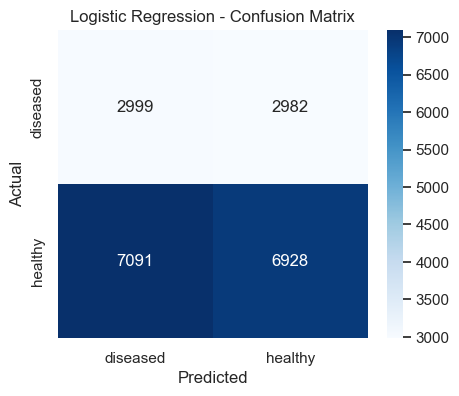


🔹 Training Random Forest...
Accuracy: 0.7003
Classification Report:
               precision    recall  f1-score   support

    diseased       0.30      0.00      0.00      5981
     healthy       0.70      1.00      0.82     14019

    accuracy                           0.70     20000
   macro avg       0.50      0.50      0.41     20000
weighted avg       0.58      0.70      0.58     20000



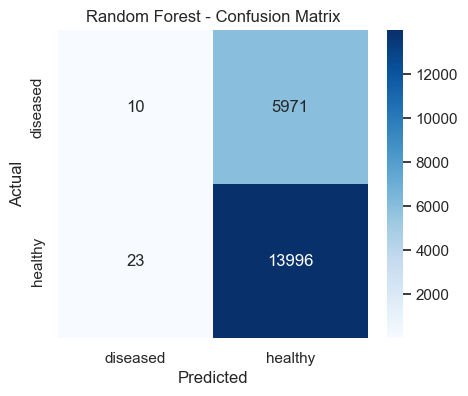


🔹 Training SVM...


In [ ]:
# Cell 13
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)

    # Predict
    y_pred = model.predict(X_test_processed)

    # Evaluate
    acc = accuracy_score(y_test_enc, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

    # Confusion Matrix
    cm = confusion_matrix(y_test_enc, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()